# Week 4 Deliverable

In [48]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

# Problem definition

Cluster players by overall scored according to 'shot_power', 'heading_accuracy', etc.


# Load the data

In [49]:
dfw = pd.read_csv('../../data/raw/complete.csv')
df = dfw[0:200]
print(df.columns)
df.head()

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


# Feature Engineering 

In [50]:
# select the columns
#X_columns = df.columns[2:]
X_columns = ['shot_power', 'heading_accuracy', 'finishing', 'ball_control', 'overall']

# normalize the data
for col in X_columns:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

/home/bda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Model Training

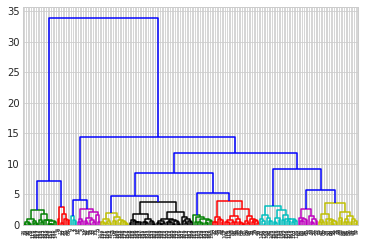

{1, 2, 3, 4}
Counter({3: 95, 4: 59, 1: 28, 2: 18})


In [51]:
k = 4
color_threshold = 4.
d = sch.distance.pdist(df[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df.copy()
df_results['cluster'] = T

In [52]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['name'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['name'])))

1 28
['A. Lopes', 'B. Leno', 'Casillas', 'D. Subašić', 'De Gea', 'Diego López', 'Ederson', 'G. Buffon', 'G. Donnarumma', 'G. Rulli', 'H. Lloris', 'J. Oblak', 'José Reina', 'K. Navas', 'K. Schmeichel', 'M. Neuer', 'M. Perin', 'M. ter Stegen', 'P. Čech', 'R. Bürki', 'R. Fährmann', 'Rui Patrício', 'S. Handanovič', 'S. Ruffier', 'Sergio Asenjo', 'T. Courtois', 'T. Horn', 'Y. Sommer']
2 18
['A. Griezmann', 'A. Robben', 'A. Sánchez', 'Cristiano Ronaldo', 'E. Hazard', 'G. Bale', 'G. Higuaín', 'K. De Bruyne', 'L. Messi', 'L. Suárez', 'Neymar', 'P. Aubameyang', 'P. Dybala', 'R. Lewandowski', 'S. Agüero', 'Sergio Ramos', 'T. Kroos', 'Z. Ibrahimović']
3 95
['A. Belotti', 'A. Di María', 'A. Gómez', 'A. Lacazette', 'A. Lallana', 'A. Valencia', 'Adrien Silva', 'Aduriz', 'Ander Herrera', 'B. Dost', 'Bernardo Silva', 'Borja Valero', 'Bruno', 'C. Eriksen', 'C. Immobile', 'Coutinho', 'D. Alli', 'D. De Rossi', 'D. Mertens', 'D. Payet', 'Dani Alves', 'Danilo Pereira', 'David Silva', 'E. Banega', 'E. Džeko

In [53]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,1,2,3,4
ID,163215.75,1.540873e+05,180168.14,182876.68
special,1297.04,2.131670e+03,2060.33,1975.12
age,28.50,2.850000e+01,27.63,27.78
height_cm,190.11,1.798900e+02,178.93,185.97
weight_kg,86.32,7.639000e+01,73.80,81.08
real_face,0.54,1.000000e+00,0.73,0.83
eur_value,27678571.43,7.641667e+07,31826315.79,35381355.93
eur_wage,82428.57,3.186111e+05,115526.32,150372.88
eur_release_clause,53092857.14,1.459722e+08,61698876.40,66684482.76
overall,0.01,2.050000e+00,-0.45,0.10


shot_power


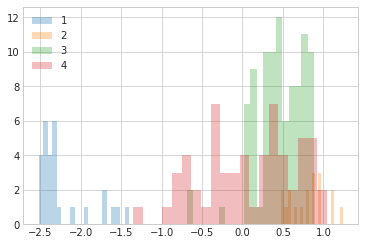

heading_accuracy


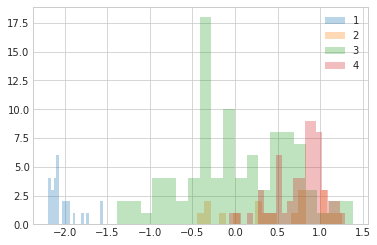

finishing


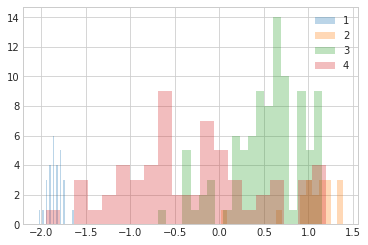

ball_control


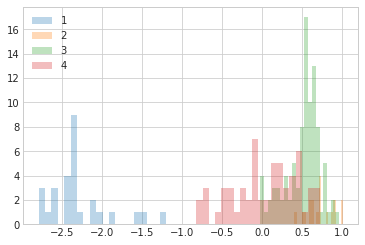

overall


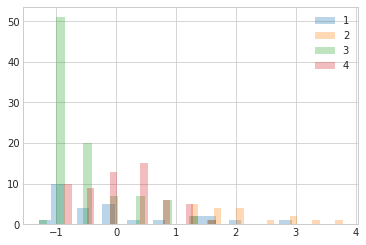

In [54]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(T):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

4
shot_power


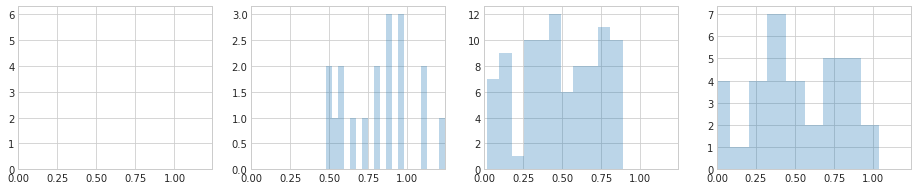

heading_accuracy


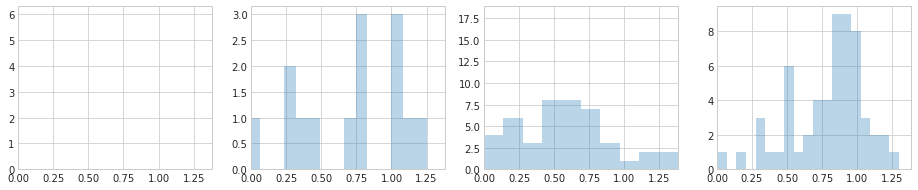

finishing


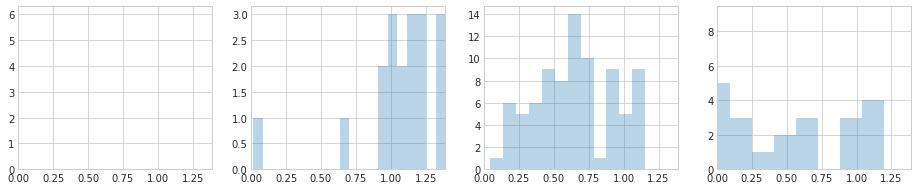

ball_control


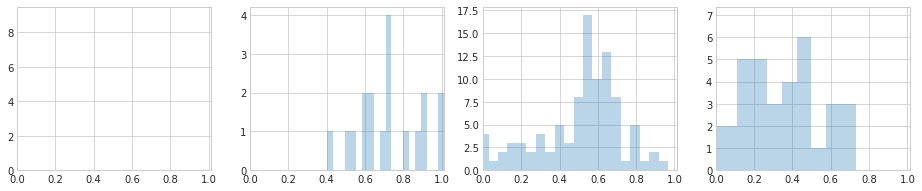

overall


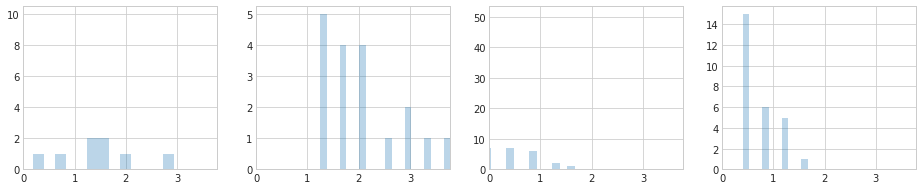

In [55]:
# Analyze the results
n_clusters = len(set(T))
print(n_clusters)
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(T)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

shot_power


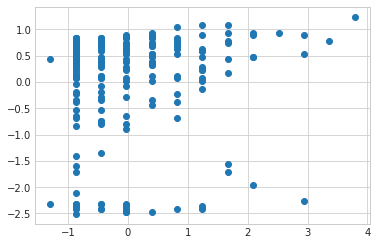

heading_accuracy


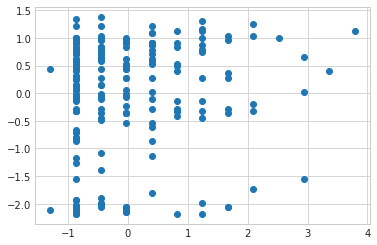

finishing


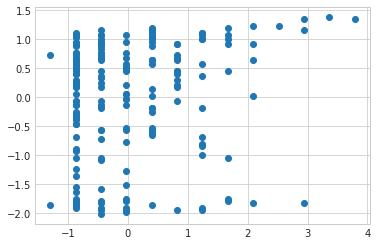

ball_control


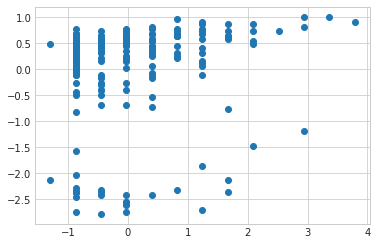

overall


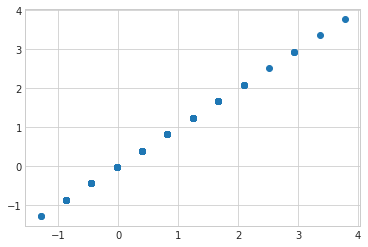

In [56]:
# Analyze the correlation with Happiness Score
for c in ['shot_power', 'heading_accuracy', 'finishing', 'ball_control', 'overall']:
    print(c)
    plt.plot(df_results['overall'], df_results[c], 'o')
    plt.show()

# Model Evaluation

In [45]:
# Intra-Cluster
centroids = []
for cluster in sorted(set(T)):
    centroids.append(df_results[df_results['cluster']==cluster][X_columns].mean().values)
print('Intra-Cluster Distances', sum(sum(euclidean_distances(centroids, centroids))))

# Inter-Cluster
distances = 0
for cluster in sorted(set(T)):
    centroid = df_results[df_results['cluster']==cluster][X_columns].mean().values
    distances += (sum(euclidean_distances(df_results[df_results['cluster']==cluster][X_columns].values, centroid.reshape(1, -1))))[0]
print('Inter-Cluster Distances', distances)

Intra-Cluster Distances 279.8572507574878
Inter-Cluster Distances 137.11221554820565
